 BITCOIN PREDICTION 2022

Deliver 1 - Trying Different Models

In [704]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time
import datetime
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(database="CRYPTO",
                        user='postgres', password='WelcomE01', 
                        host='127.0.0.1', port='5432'
)
  
conn.autocommit = True
cursor = conn.cursor()
sql = '''CREATE TABLE CRYPO_DATA_FEED (
TimeStamp	bigint NOT NULL,
Open  		NUMERIC(8,2),
High 		NUMERIC(8,2),
Low	 		NUMERIC(8,2),
Close		NUMERIC(8,2),
Volume_BTC Float,
Volume_Crrency Float,
Weightted_Price float,
	PRIMARY KEY (TimeStamp)
);'''
cursor.execute(sql)
csv_file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

sql = "COPY CRYPO_DATA_FEED FROM STDIN DELIMITER ',' CSV HEADER"

cursor.copy_expert(sql, open(csv_file_name, "r"))

In [4]:
Bit_df = pd.read_sql("select * from CRYPO_DATA_FEED", conn);
Bit_df.head()

KeyboardInterrupt: 

In [705]:
# Import Data
Bit_df = pd.read_csv("C:/Users/v-ansi20/Desktop/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
# show the first 5 rows
Bit_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [706]:
Bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [707]:
Bit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,4857377.0,1.471301e+09,8.428019e+07,1.325318e+09,1.398179e+09,1.471428e+09,1.544288e+09,1.617149e+09
Open,3613769.0,6.009024e+03,8.996247e+03,3.800000e+00,4.438600e+02,3.596970e+03,8.627270e+03,6.176356e+04
High,3613769.0,6.013357e+03,9.003521e+03,3.800000e+00,4.440000e+02,3.598190e+03,8.632980e+03,6.178183e+04
Low,3613769.0,6.004488e+03,8.988778e+03,1.500000e+00,4.435200e+02,3.595620e+03,8.621090e+03,6.167355e+04
Close,3613769.0,6.009014e+03,8.996360e+03,1.500000e+00,4.438600e+02,3.597000e+03,8.627160e+03,6.178180e+04
Volume_(BTC),3613769.0,9.323249e+00,3.054989e+01,0.000000e+00,4.097759e-01,1.979811e+00,7.278216e+00,5.853852e+03
Volume_(Currency),3613769.0,4.176284e+04,1.518248e+05,0.000000e+00,4.521422e+02,3.810124e+03,2.569821e+04,1.390067e+07
Weighted_Price,3613769.0,6.008935e+03,8.995992e+03,3.800000e+00,4.438306e+02,3.596804e+03,8.627637e+03,6.171621e+04


In [708]:
Bit_df.isnull().values.any() # If there are any null values in data set

True

In [709]:
#Finding what all columns has null values and if it does then how many
Bit_df.isnull().sum()
# other than Timestamp all columns has null values, will imputing to fix this issue

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [710]:
#Drop NaNs from Dataset. 
#Bit_df.dropna(inplace=True)
# show the first 5 rows
#Bit_df.head()

In [711]:
# Clean DataFrame for Prediction utilization. 
# Remove Volume Currency from DF
Bit_df.drop(['Volume_(Currency)','Volume_(BTC)'],1,inplace=True)
# show the first 5 rows
Bit_df.head()

,Timestamp,Open,High,Low,Close,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [712]:
# Rename Timestamp and Weighted_Price
Bit_df.rename(columns = {'Timestamp':'DateTime', 'Weighted_Price':'Weighted Price'}, inplace = True)
# show the first 5 rows
Bit_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [713]:
Bitcoin_df = Bit_df.copy(deep=True)
Bitcoin_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [714]:
# Convert Timestamp into TimeZone (ET)
#Bit_df['Last Update'] = (pd.to_datetime(Bit_df['Last Update'], unit='s')
               #      .dt.tz_localize('est')
                 #    .dt.tz_convert('America/New_York'))
# show the first 5 rows
#Bit_df.head()

In [715]:
Bit_df['DateTime'] = pd.to_datetime(Bit_df['DateTime'], unit='s')
Bit_df['DateTime'] = pd.to_datetime(Bit_df['DateTime']).dt.to_period('m')
Bit_df.set_index(Bit_df['DateTime'], inplace=True)
Bit_df.drop(['DateTime'],axis=1,inplace=True)
Bit_df=Bit_df.to_timestamp()
Bit_df.head()

,Open,High,Low,Close,Weighted Price
DateTime,,,,,
2011-12-01,4.39,4.39,4.39,4.39,4.39
2011-12-01,NaN,NaN,NaN,NaN,NaN
2011-12-01,NaN,NaN,NaN,NaN,NaN
2011-12-01,NaN,NaN,NaN,NaN,NaN
2011-12-01,NaN,NaN,NaN,NaN,NaN


In [716]:
# Clean Last Update into ms.
#Bit_df['Last Update'] = Bit_df['Last Update'].values.astype(dtype='datetime64[ms]')
# show the first 5 rows
#Bit_df.head()

No handles with labels found to put in legend.


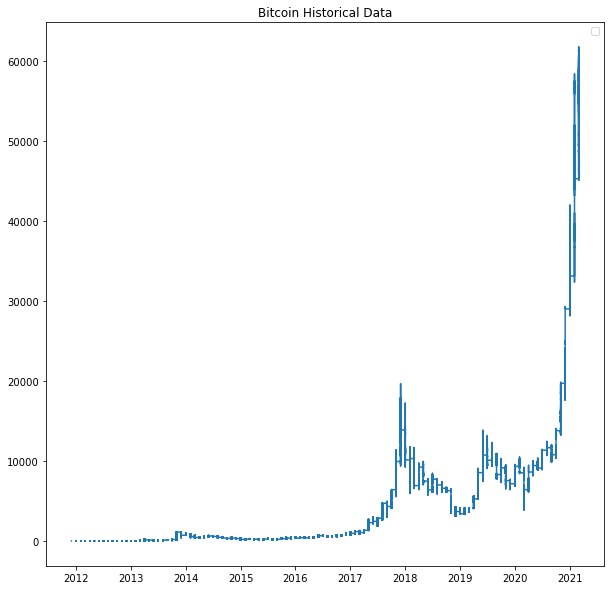

In [717]:
plt.figure(figsize=[10,10])
plt.legend(loc='best')
plt.title('Bitcoin Historical Data')
plt.plot(Bit_df['Weighted Price'])
plt.show()

In [718]:
# Esport Clean DF into CSV
#Bit_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2011-2020_Clean.csv', index = False, header=True)

In [719]:
# Let's create a new dataframe to use for our prediction
#Convert Timestamp into TimeZone (ET)
Bitcoin_df['DateTime'] = (pd.to_datetime(Bitcoin_df['DateTime'], unit='s')
                    .dt.tz_localize('est')
                     .dt.tz_convert('America/New_York'))
# show the first 5 rows
Bitcoin_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,2011-12-31 07:52:00-05:00,4.39,4.39,4.39,4.39,4.39
1,2011-12-31 07:53:00-05:00,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00-05:00,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00-05:00,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00-05:00,NaN,NaN,NaN,NaN,NaN


In [720]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 6 columns):
 #   Column          Dtype                           
---  ------          -----                           
 0   DateTime        datetime64[ns, America/New_York]
 1   Open            float64                         
 2   High            float64                         
 3   Low             float64                         
 4   Close           float64                         
 5   Weighted Price  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5)
memory usage: 222.4 MB


In [721]:
#Let's filter new DataFrame for 2021 year/data only. 
Bitcoin2021_df_seasonal = Bitcoin_df[(Bitcoin_df["DateTime"] >= '2017-01-01')]
Bitcoin2021_df_seasonal.head()

,DateTime,Open,High,Low,Close,Weighted Price
2625376,2017-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2625377,2017-01-01 00:01:00-05:00,966.34,966.34,966.34,966.34,966.340000
2625378,2017-01-01 00:02:00-05:00,966.16,966.37,966.16,966.37,966.305479
2625379,2017-01-01 00:03:00-05:00,NaN,NaN,NaN,NaN,NaN
2625380,2017-01-01 00:04:00-05:00,NaN,NaN,NaN,NaN,NaN


In [722]:
# Data Preprocessing:
Bitcoin2021_df_seasonal['High'].fillna(method='ffill', inplace=True)
Bitcoin2021_df_seasonal['Low'].fillna(method='ffill', inplace=True)
Bitcoin2021_df_seasonal['Close'].fillna(method='ffill', inplace=True)
Bitcoin2021_df_seasonal['Open'].fillna(method='ffill', inplace=True)
Bitcoin2021_df_seasonal['Weighted Price'].fillna(method='ffill', inplace=True)

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [723]:
# Assing Timestamp as a index
Bitcoin2021_df_seasonal.index = Bitcoin2021_df_seasonal.DateTime
Bitcoin2021_df_seasonal.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2017-01-01 00:00:00-05:00,2017-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:01:00-05:00,2017-01-01 00:01:00-05:00,966.34,966.34,966.34,966.34,966.340000
2017-01-01 00:02:00-05:00,2017-01-01 00:02:00-05:00,966.16,966.37,966.16,966.37,966.305479
2017-01-01 00:03:00-05:00,2017-01-01 00:03:00-05:00,966.16,966.37,966.16,966.37,966.305479
2017-01-01 00:04:00-05:00,2017-01-01 00:04:00-05:00,966.16,966.37,966.16,966.37,966.305479


<AxesSubplot:xlabel='DateTime'>

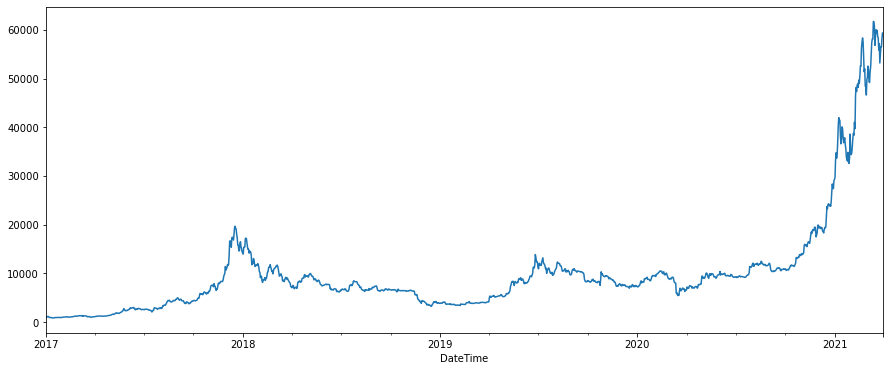

In [724]:
Bitcoin2021_df_seasonal['Weighted Price'].resample(rule='D').max().plot(figsize=(15,6))

### Let's use 2021 Bitcoin Data only.

In [725]:
#Let's filter new DataFrame for 2021 year/data only. 
Bitcoin2021_df = Bitcoin_df[(Bitcoin_df["DateTime"] >= '2021-01-01')]
Bitcoin2021_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
4729216,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
4729217,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
4729218,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
4729219,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
4729220,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [726]:
Bitcoin2021_df.tail()

,DateTime,Open,High,Low,Close,Weighted Price
4857372,2021-03-31 00:56:00-04:00,58714.31,58714.31,58686.00,58686.00,58692.753339
4857373,2021-03-31 00:57:00-04:00,58683.97,58693.43,58683.97,58685.81,58693.226508
4857374,2021-03-31 00:58:00-04:00,58693.43,58723.84,58693.43,58723.84,58696.198496
4857375,2021-03-31 00:59:00-04:00,58742.18,58770.38,58742.18,58760.59,58761.866202
4857376,2021-03-31 01:00:00-04:00,58767.75,58778.18,58755.97,58778.18,58764.349363


In [727]:
Bitcoin2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 4729216 to 4857376
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype                           
---  ------          --------------   -----                           
 0   DateTime        128161 non-null  datetime64[ns, America/New_York]
 1   Open            128025 non-null  float64                         
 2   High            128025 non-null  float64                         
 3   Low             128025 non-null  float64                         
 4   Close           128025 non-null  float64                         
 5   Weighted Price  128025 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5)
memory usage: 6.8 MB


In [728]:
#Finding what all columns has null values and if it does then how many
Bitcoin2021_df.isnull().sum()

DateTime            0
Open              136
High              136
Low               136
Close             136
Weighted Price    136
dtype: int64

In [491]:
#Bitcoin2021_df_copy = Bit_df.copy(deep=True)
#Bitcoin2021_df_copy.head()

In [492]:
# Data Preprocessing:
#imputing missing values in columns Open, High, Close, Volume_(BTC),Volume_(Currency), Weighted Price
#Bitcoin2021_df_copy['Open'] = Bitcoin2021_df_copy.groupby(['High','Close','Low','Volume_(BTC)','Volume_(Currency)','Weighted Price'])['Open'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['High'] = Bitcoin2021_df_copy.groupby(['Open','Close','Low','Volume_(BTC)','Volume_(Currency)','Weighted Price'])['High'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['Low'] = Bitcoin2021_df_copy.groupby(['Open','Close','High','Volume_(BTC)','Volume_(Currency)','Weighted Price'])['Low'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['Close'] = Bitcoin2021_df_copy.groupby(['Open','High','Low','Volume_(BTC)','Volume_(Currency)','Weighted Price'])['Close'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['Volume_(BTC)'] = Bitcoin2021_df_copy.groupby(['Open','Close','High','Low','Volume_(Currency)','Weighted Price'])['Volume_(BTC)'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['Volume_(Currency)'] = Bitcoin2021_df_copy.groupby(['Open','Close','High','Low','Volume_(BTC)','Weighted Price'])['Volume_(Currency)'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_copy['Weighted Price'] = Bitcoin2021_df_copy.groupby(['Open','Close','High','Low','Volume_(BTC)','Volume_(Currency)'])['Weighted Price'].apply(lambda x:x.fillna(x.median()))

In [493]:
#Drop NaNs from Dataset. 
#Bitcoin2021_df.dropna(inplace=True)
# show the first 5 rows
#Bitcoin2021_df.head()

In [137]:
# Esport Clean 2021 DF into CSV
#Bitcoin2021_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2021_Clean.csv', index = False, header=True)

In [359]:
# Importing date libraries to split date info in different colummns and remove Last Update column
import datetime as dt
#Bitcoin2021_df["Date"]=pd.to_datetime(Bitcoin2021_df["Last Update"])
#Bitcoin2021_df["Stock Date"] = pd.to_datetime(Bitcoin2021_df["Last Update"]).dt.date
#Bitcoin2021_df['Date_year'] = Bitcoin2021_df["Last Update"].dt.year
#Bitcoin2021_df['Date_month'] = Bitcoin2021_df["Last Update"].dt.month
#Bitcoin2021_df['Date_day'] = Bitcoin2021_df["Last Update"].dt.day
#Bitcoin2021_df['Date_hour'] = Bitcoin2021_df["Last Update"].dt.hour
#Bitcoin2021_df['Date_minute'] = Bitcoin2021_df["Last Update"].dt.minute
#Bitcoin2021_df['Date_second'] = Bitcoin2021_df["Last Update"].dt.second

<ipython-input-359-9e039cf1afec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin2021_df["Stock Date"] = pd.to_datetime(Bitcoin2021_df["Last Update"]).dt.date


In [729]:
# show the first 5 rows
Bitcoin2021_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
4729216,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
4729217,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
4729218,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
4729219,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
4729220,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [730]:
# Assing Timestamp as a index
Bitcoin2021_df.index = Bitcoin2021_df.DateTime
Bitcoin2021_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2021-01-01 00:00:00-05:00,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01 00:01:00-05:00,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01 00:02:00-05:00,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01 00:03:00-05:00,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01 00:04:00-05:00,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [731]:
# Data Preprocessing:
Bitcoin2021_df['High'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Low'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Close'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Open'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Weighted Price'].fillna(method='ffill', inplace=True)

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [732]:
Bitcoin2021_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128161 entries, 2021-01-01 00:00:00-05:00 to 2021-03-31 01:00:00-04:00
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype                           
---  ------          --------------   -----                           
 0   DateTime        128161 non-null  datetime64[ns, America/New_York]
 1   Open            128161 non-null  float64                         
 2   High            128161 non-null  float64                         
 3   Low             128161 non-null  float64                         
 4   Close           128161 non-null  float64                         
 5   Weighted Price  128161 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5)
memory usage: 6.8 MB


In [733]:
#Finding what all columns has null values and if it does then how many
Bitcoin2021_df.isnull().sum()

DateTime          0
Open              0
High              0
Low               0
Close             0
Weighted Price    0
dtype: int64

In [374]:
# Data Preprocessing:
#Bitcoin2021_df_new['Open'] = Bitcoin2021_df_new.groupby(['Stock Date'])['Open'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_new['High'] = Bitcoin2021_df_new.groupby(['Stock Date'])['High'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_new['Low'] = Bitcoin2021_df_new.groupby(['Stock Date'])['Low'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_new['Close'] = Bitcoin2021_df_new.groupby(['Stock Date'])['Close'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df['Volume_(BTC)'] = Bitcoin2021_df.groupby(['Open','Close','High','Low','Volume_(Currency)','Weighted Price'])['Volume_(BTC)'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df['Volume_(Currency)'] = Bitcoin2021_df.groupby(['Open','Close','High','Low','Volume_(BTC)','Weighted Price'])['Volume_(Currency)'].apply(lambda x:x.fillna(x.median()))
#Bitcoin2021_df_new['Weighted Price'] = Bitcoin2021_df_new.groupby(['Stock Date'])['Weighted Price'].apply(lambda x:x.fillna(x.median()))

In [82]:
#Now we have a clean Weighted Price to predict some Bitcoin Price for the next 15 days. 

In [ ]:
# 15 Days Prediction Model
# Machine Learning Coding. 
# Create Variable bitCoinPredictionDays to set the days.

In [734]:
# Remove all columns except Weighted Price from Bitcoin2021_df
#Bitcoin2021_df.drop(['Open','High','Low','Close','Date','Date_year','Date_month','Date_day','Date_hour','Date_minute','Date_second'],1,inplace=True)
#Bitcoin2021_df.drop(['Open','High','Low','Close'],1,inplace=True)
# show the first 5 rows
#Bitcoin2021_df.head()

In [735]:
Bitcoin2021_df_copy = Bitcoin2021_df.copy(deep=True)
Bitcoin2021_df_copy.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2021-01-01 00:00:00-05:00,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01 00:01:00-05:00,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01 00:02:00-05:00,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01 00:03:00-05:00,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01 00:04:00-05:00,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


<AxesSubplot:xlabel='DateTime'>

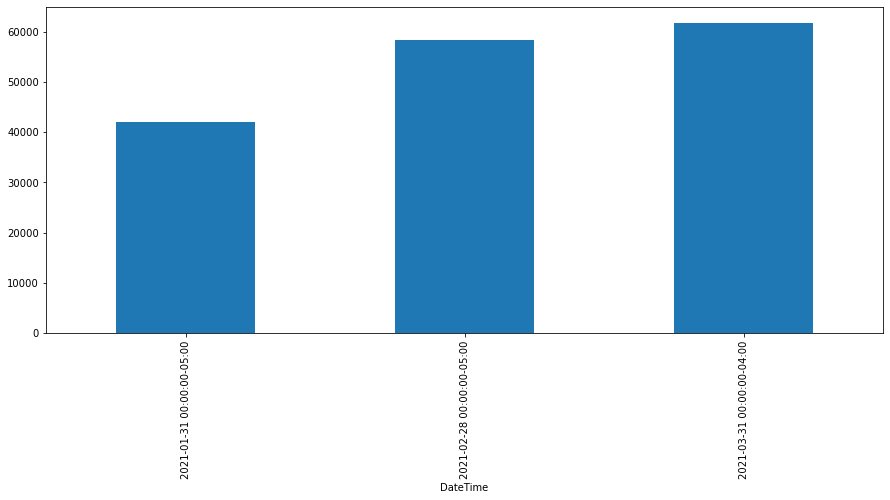

In [736]:
Bitcoin2021_df_copy['Close'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [737]:
# Resampling to daily frequency
Bitcoin2021_df_copy = Bitcoin2021_df_copy.resample('D').mean()

In [738]:
Bitcoin2021_df_copy.head()

,Open,High,Low,Close,Weighted Price
DateTime,,,,,
2021-01-01 00:00:00-05:00,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917
2021-01-02 00:00:00-05:00,30757.308146,30788.244361,30723.941208,30759.932167,30757.429533
2021-01-03 00:00:00-05:00,33467.147104,33507.975028,33425.661465,33468.163000,33467.362526
2021-01-04 00:00:00-05:00,31856.851236,31903.705937,31807.243889,31856.172236,31856.122685
2021-01-05 00:00:00-05:00,32272.714361,32314.153514,32230.931611,32274.551042,32273.087909


In [739]:
Bitcoin2021_df_copy.describe()

,Open,High,Low,Close,Weighted Price
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45056.669009,45095.093688,45017.520973,45057.314691,45055.058238
std,9520.634340,9520.306086,9521.320884,9521.050530,9520.462319
min,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917
25%,35280.160429,35312.859172,35246.236479,35280.036681,35277.232061
50%,47205.918819,47237.050809,47173.152993,47206.295806,47202.944686
75%,54521.714168,54558.972125,54465.017901,54523.452557,54521.241149
max,60472.093942,60501.954652,60441.543319,60473.485717,60470.096319


In [740]:
def bitcoin_stationary(dataframe):
    result = adfuller(dataframe)
    print('bitcoin_Stationary: {}'.format(result[0]))
    print('p value:{}'.format(result[1]))
    if result[1]<=0.05:
        print('Stationary')
    else:
        print('Non Stationary')

In [741]:
bitcoin_stationary(Bitcoin2021_df_copy['Weighted Price'])

bitcoin_Stationary: -1.1240296270850538
p value:0.7053946668708265
Non Stationary


In [742]:
## Use Techniques Differencing
Bitcoin2021_df_copy['Price First Difference']=Bitcoin2021_df_copy['Weighted Price']-Bitcoin2021_df_copy['Weighted Price'].shift(1)

In [743]:
bitcoin_stationary(Bitcoin2021_df_copy['Price First Difference'].dropna())

bitcoin_Stationary: -8.178994067748276
p value:8.228308499848817e-13
Stationary


<AxesSubplot:xlabel='DateTime'>

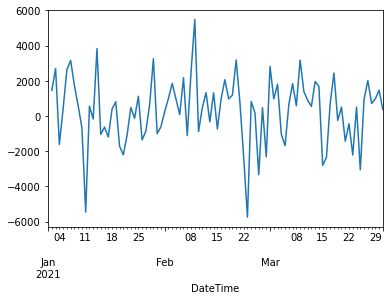

In [744]:
Bitcoin2021_df_copy['Price First Difference'].plot()

In [745]:
Bitcoin2021_df_copy['Seasonal First Difference']=Bitcoin2021_df_copy['Weighted Price']-Bitcoin2021_df_copy['Weighted Price'].shift(18)

In [746]:
Bitcoin2021_df_copy.head(20)

,Open,High,Low,Close,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,,,,,
2021-01-01 00:00:00-05:00,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.308146,30788.244361,30723.941208,30759.932167,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.147104,33507.975028,33425.661465,33468.163000,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.851236,31903.705937,31807.243889,31856.172236,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32272.714361,32314.153514,32230.931611,32274.551042,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34906.719729,34947.409486,34862.609000,34907.603576,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38069.991174,38118.921056,38015.810944,38071.505882,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39811.488014,39873.263097,39745.853319,39811.639694,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40399.364424,40436.382826,40357.888361,40399.011125,40395.370088,587.766349,NaN


In [747]:
## Again test dickey fuller test
bitcoin_stationary(Bitcoin2021_df_copy['Seasonal First Difference'].dropna())

bitcoin_Stationary: -3.8326173870035927
p value:0.002590682372861766
Stationary


<AxesSubplot:xlabel='DateTime'>

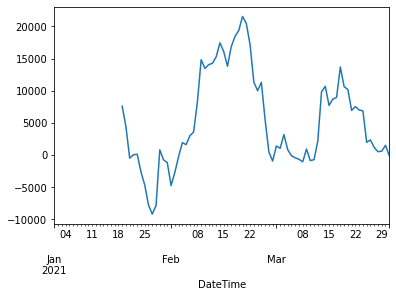

In [748]:
Bitcoin2021_df_copy['Seasonal First Difference'].plot()

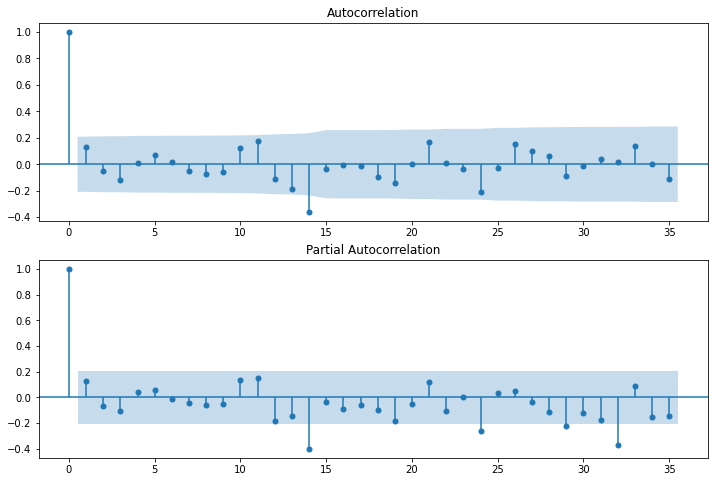

In [749]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(Bitcoin2021_df_copy['Price First Difference'].iloc[1:],lags=35,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(Bitcoin2021_df_copy['Price First Difference'].iloc[1:],lags=35,ax=ax2)

In [750]:
Bitcoin2021_df_copy.drop(['Open','High','Low','Close'],1,inplace=True)
# show the first 5 rows
Bitcoin2021_df_copy.head()

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-01-01 00:00:00-05:00,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN


In [751]:
Bitcoin2021_df_copy.head(20)

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-01-01 00:00:00-05:00,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40395.370088,587.766349,NaN


In [752]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,2,28)
test_dataset_end=datetime(2021,3,31)

In [753]:
train_data=Bitcoin2021_df_copy[:train_dataset_end]
test_data=Bitcoin2021_df_copy[train_dataset_end+timedelta(days=1):test_dataset_end]

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


In [754]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [755]:
test_data

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-03-01 00:00:00-05:00,47640.764004,2820.736432,1368.548335
2021-03-02 00:00:00-05:00,48617.289321,976.525317,1013.873901
2021-03-03 00:00:00-05:00,50426.994299,1809.704978,3152.894578
2021-03-04 00:00:00-05:00,49398.250399,-1028.743901,801.049181
2021-03-05 00:00:00-05:00,47717.643300,-1680.607098,-145.358126
2021-03-06 00:00:00-05:00,48372.181680,654.538380,-472.984324
2021-03-07 00:00:00-05:00,50214.468638,1842.286958,-699.455501
2021-03-08 00:00:00-05:00,50797.906696,583.438058,-1095.404486
2021-03-09 00:00:00-05:00,53980.847262,3182.940566,896.968153


In [756]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [757]:
train_data

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-01-01 00:00:00-05:00,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40395.370088,587.766349,NaN


In [758]:
model_ARIMA=ARIMA(train_data['Weighted Price'],order=(1,1,1))

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [759]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [760]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Weighted Price   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -522.254
Method:                       css-mle   S.D. of innovations           1968.870
Date:                Sun, 13 Mar 2022   AIC                           1052.508
Time:                        13:50:46   BIC                           1060.750
Sample:                    01-02-2021   HQIC                          1055.718
                         - 02-28-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    261.7978    288.241      0.908      0.364    -303.144     826.739
ar.L1.D.Weighted Price    -0.2489      0.906     -0.275      0.783      -2.024       1.526
ma.L1.D.Weighted Price     0.3939      0.866      0.455      0.649      -1.304       2.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.0182           +0.0000j            4.0182            0.5000
MA.1           -2.5386           +0.0000j            2.5386            0.5000
-----------------------------------------------------------------------------
"""

In [761]:
test_data

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-03-01 00:00:00-05:00,47640.764004,2820.736432,1368.548335
2021-03-02 00:00:00-05:00,48617.289321,976.525317,1013.873901
2021-03-03 00:00:00-05:00,50426.994299,1809.704978,3152.894578
2021-03-04 00:00:00-05:00,49398.250399,-1028.743901,801.049181
2021-03-05 00:00:00-05:00,47717.643300,-1680.607098,-145.358126
2021-03-06 00:00:00-05:00,48372.181680,654.538380,-472.984324
2021-03-07 00:00:00-05:00,50214.468638,1842.286958,-699.455501
2021-03-08 00:00:00-05:00,50797.906696,583.438058,-1095.404486
2021-03-09 00:00:00-05:00,53980.847262,3182.940566,896.968153


In [762]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-01 00:00:00-05:00
2021-03-31 00:00:00-04:00


In [763]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Weighted Price']-pred

In [764]:
pred

2021-03-01 00:00:00-05:00   -194.952341
2021-03-02 00:00:00-05:00    375.468311
2021-03-03 00:00:00-05:00    233.508853
2021-03-04 00:00:00-05:00    268.838022
2021-03-05 00:00:00-05:00    260.045722
2021-03-06 00:00:00-05:00    262.233844
2021-03-07 00:00:00-05:00    261.689291
2021-03-08 00:00:00-05:00    261.824813
2021-03-09 00:00:00-05:00    261.791086
2021-03-10 00:00:00-05:00    261.799479
2021-03-11 00:00:00-05:00    261.797390
2021-03-12 00:00:00-05:00    261.797910
2021-03-13 00:00:00-05:00    261.797781
2021-03-14 00:00:00-05:00    261.797813
2021-03-15 00:00:00-04:00    261.797805
2021-03-16 00:00:00-04:00    261.797807
2021-03-17 00:00:00-04:00    261.797806
2021-03-18 00:00:00-04:00    261.797807
2021-03-19 00:00:00-04:00    261.797807
2021-03-20 00:00:00-04:00    261.797807
2021-03-21 00:00:00-04:00    261.797807
2021-03-22 00:00:00-04:00    261.797807
2021-03-23 00:00:00-04:00    261.797807
2021-03-24 00:00:00-04:00    261.797807
2021-03-25 00:00:00-04:00    261.797807


In [765]:
residuals

DateTime
2021-03-01 00:00:00-05:00    47835.716345
2021-03-02 00:00:00-05:00    48241.821009
2021-03-03 00:00:00-05:00    50193.485446
2021-03-04 00:00:00-05:00    49129.412376
2021-03-05 00:00:00-05:00    47457.597578
2021-03-06 00:00:00-05:00    48109.947836
2021-03-07 00:00:00-05:00    49952.779347
2021-03-08 00:00:00-05:00    50536.081883
2021-03-09 00:00:00-05:00    53719.056176
2021-03-10 00:00:00-05:00    55111.377816
2021-03-11 00:00:00-05:00    56010.382743
2021-03-12 00:00:00-05:00    56564.762123
2021-03-13 00:00:00-05:00    58531.901129
2021-03-14 00:00:00-05:00    60208.298506
2021-03-15 00:00:00-04:00    57412.190460
2021-03-16 00:00:00-04:00    55071.584807
2021-03-17 00:00:00-04:00    55804.186879
2021-03-18 00:00:00-04:00    58247.630113
2021-03-19 00:00:00-04:00    58001.545221
2021-03-20 00:00:00-04:00    58513.251988
2021-03-21 00:00:00-04:00    57085.642509
2021-03-22 00:00:00-04:00    56649.190895
2021-03-23 00:00:00-04:00    54439.574638
2021-03-24 00:00:00-04:00

<AxesSubplot:ylabel='Density'>

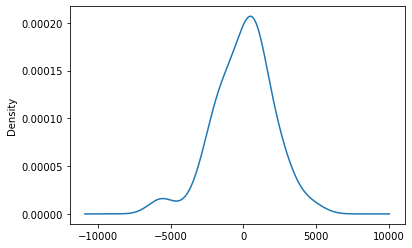

In [766]:
model_Arima_fit.resid.plot(kind='kde')

In [767]:
test_data['Predicted_ARIMA']=pred

<ipython-input-767-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DateTime'>

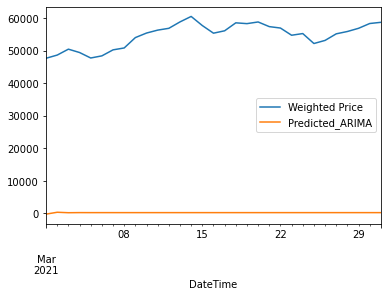

In [768]:
test_data[['Weighted Price','Predicted_ARIMA']].plot()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


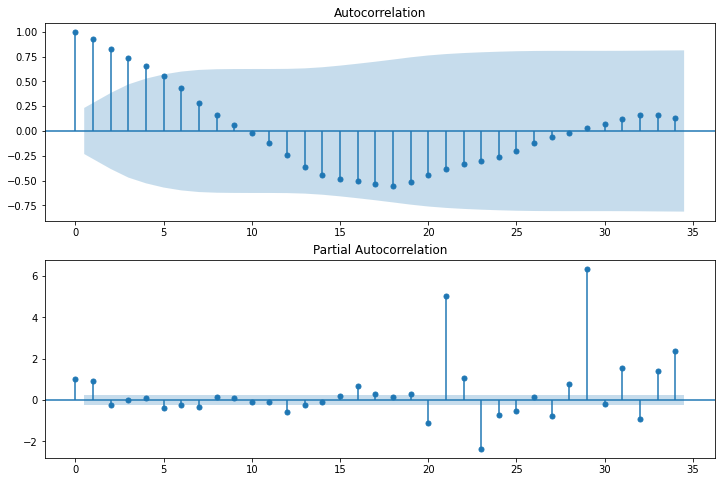

In [769]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(Bitcoin2021_df_copy['Seasonal First Difference'].iloc[19:],lags=34,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(Bitcoin2021_df_copy['Seasonal First Difference'].iloc[19:],lags=34,ax=ax2)

In [770]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [771]:
model_SARIMA=SARIMAX(train_data['Weighted Price'],order=(2,1,5),seasonal_order=(2,1,5,18))

In [772]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [773]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Weighted Price   No. Observations:                   59
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 18)   Log Likelihood                -365.020
Date:                            Sun, 13 Mar 2022   AIC                            760.039
Time:                                    13:51:59   BIC                            785.372
Sample:                                01-01-2021   HQIC                           769.199
                                     - 02-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8138      1.413      0.576      0.565      -1.955       3.583
ar.L2         -0.9911      1.582     -0.627      0.531      -4.091       2.109
ma.L1         -0.7006      1.713     -0.409      0.683      -4.058       2.657
ma.L2          1.0032      1.755      0.572      0.568      -2.436       4.443
ma.L3          0.0275      0.618      0.045      0.964      -1.183       1.238
ma.L4          0.0589      0.504      0.117      0.907      -0.929       1.047
ma.L5          0.0308      0.546      0.056      0.955      -1.040       1.101
ar.S.L18       1.0930   1.37e+04   7.97e-05      1.000   -2.69e+04    2.69e+04
ar.S.L36      -0.8127   1576.849     -0.001      1.000   -3091.380    3089.755
ma.S.L18      -1.4733   1.35e+04     -0.000      1.000   -2.64e+04    2.64e+04
ma.S.L36       1.1491   4146.185      0.000      1.000   -8125.224    8127.522
ma.S.L54      -0.3733   2320.390     -0.000      1.000   -4548.253    4547.507
ma.S.L72       0.1613   3119.483   5.17e-05      1.000   -6113.914    6114.236
ma.S.L90      -0.1388    438.506     -0.000      1.000    -859.596     859.318
sigma2      6.503e+06      0.209   3.11e+07      0.000     6.5e+06     6.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.64
Prob(Q):                              0.90   Prob(JB):                         0.16
Heteroskedasticity (H):               1.42   Skew:                             0.46
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.37e+25. Standard errors may be unstable.
"""

In [774]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-01 00:00:00-05:00
2021-03-31 00:00:00-04:00


In [775]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Weighted Price']-pred_Sarima

<AxesSubplot:xlabel='DateTime'>

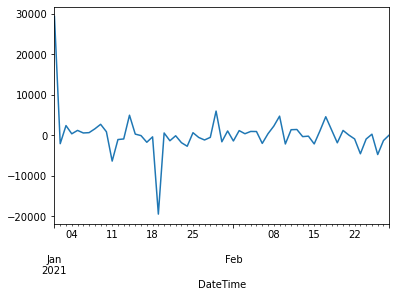

In [776]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

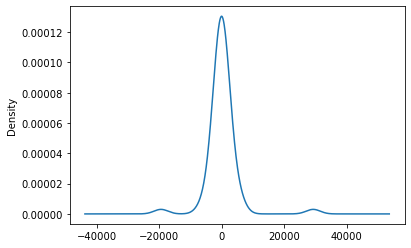

In [777]:
model_SARIMA_fit.resid.plot(kind='kde')

In [778]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-778-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [779]:
test_data

,Weighted Price,Price First Difference,Seasonal First Difference,Predicted_ARIMA,Predicted_SARIMA
DateTime,,,,,
2021-03-01 00:00:00-05:00,47640.764004,2820.736432,1368.548335,-194.952341,45045.531385
2021-03-02 00:00:00-05:00,48617.289321,976.525317,1013.873901,375.468311,47589.447327
2021-03-03 00:00:00-05:00,50426.994299,1809.704978,3152.894578,233.508853,48192.137530
2021-03-04 00:00:00-05:00,49398.250399,-1028.743901,801.049181,268.838022,48223.513432
2021-03-05 00:00:00-05:00,47717.643300,-1680.607098,-145.358126,260.045722,46244.646104
2021-03-06 00:00:00-05:00,48372.181680,654.538380,-472.984324,262.233844,46833.965769
2021-03-07 00:00:00-05:00,50214.468638,1842.286958,-699.455501,261.689291,49116.345357
2021-03-08 00:00:00-05:00,50797.906696,583.438058,-1095.404486,261.824813,51170.081203
2021-03-09 00:00:00-05:00,53980.847262,3182.940566,896.968153,261.791086,52092.427402


<AxesSubplot:xlabel='DateTime'>

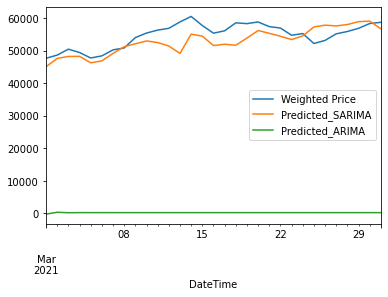

In [780]:
test_data[['Weighted Price','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [781]:
from pandas.tseries.offsets import DateOffset
April_dates=[Bitcoin2021_df_copy.index[-1]+ DateOffset(days=x)for x in range(0,15)]
April_dates_df=pd.DataFrame(index=April_dates[1:],columns=Bitcoin2021_df_copy.columns)
April_dates_df.head(16)

,Weighted Price,Price First Difference,Seasonal First Difference
2021-04-01 00:00:00-04:00,NaN,NaN,NaN
2021-04-02 00:00:00-04:00,NaN,NaN,NaN
2021-04-03 00:00:00-04:00,NaN,NaN,NaN
2021-04-04 00:00:00-04:00,NaN,NaN,NaN
2021-04-05 00:00:00-04:00,NaN,NaN,NaN
2021-04-06 00:00:00-04:00,NaN,NaN,NaN
2021-04-07 00:00:00-04:00,NaN,NaN,NaN
2021-04-08 00:00:00-04:00,NaN,NaN,NaN
2021-04-09 00:00:00-04:00,NaN,NaN,NaN
2021-04-10 00:00:00-04:00,NaN,NaN,NaN


In [782]:
April_price_df=pd.concat([Bitcoin2021_df_copy,April_dates_df])
April_price_df.tail(100)

,Weighted Price,Price First Difference,Seasonal First Difference
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40395.370088,587.766349,NaN
...,...,...,...
2021-04-10 00:00:00-04:00,NaN,NaN,NaN
2021-04-11 00:00:00-04:00,NaN,NaN,NaN
2021-04-12 00:00:00-04:00,NaN,NaN,NaN
2021-04-13 00:00:00-04:00,NaN,NaN,NaN


In [783]:
##prediction
pred_start_date=April_dates_df.index[0]
pred_end_date=April_dates_df.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-04-01 00:00:00-04:00
2021-04-14 00:00:00-04:00


C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

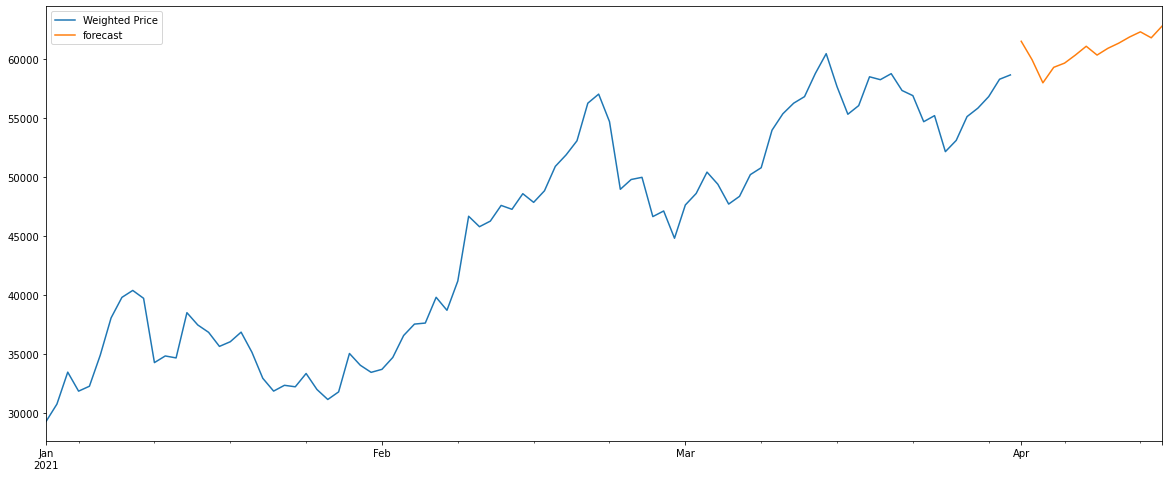

In [784]:
April_price_df['forecast'] = model_SARIMA_fit.predict(start = pred_start_date, end = pred_end_date, dynamic= True)  
April_price_df[['Weighted Price', 'forecast']].plot(figsize=(20, 8)) 

In [785]:
April_price_df.tail(20)

,Weighted Price,Price First Difference,Seasonal First Difference,forecast
2021-03-26 00:00:00-04:00,53114.811250,953.284045,2316.904555,NaN
2021-03-27 00:00:00-04:00,55133.560251,2018.749000,1152.712989,NaN
2021-03-28 00:00:00-04:00,55851.166919,717.606668,477.989624,NaN
2021-03-29 00:00:00-04:00,56831.011437,979.844518,558.831304,NaN
2021-03-30 00:00:00-04:00,58300.796047,1469.784610,1474.236014,NaN
2021-03-31 00:00:00-04:00,58667.396101,366.600053,-126.302809,NaN
2021-04-01 00:00:00-04:00,NaN,NaN,NaN,61519.782817
2021-04-02 00:00:00-04:00,NaN,NaN,NaN,59958.736515
2021-04-03 00:00:00-04:00,NaN,NaN,NaN,57997.020046
2021-04-04 00:00:00-04:00,NaN,NaN,NaN,59311.687212


In [786]:
# Try 2 
#For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [788]:
model=ARIMA(Bitcoin2021_df_copy['Weighted Price'],order=(1,1,1))
model_fit=model.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

In [789]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Weighted Price   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -795.818
Method:                       css-mle   S.D. of innovations           1849.629
Date:                Sun, 13 Mar 2022   AIC                           1599.637
Time:                        13:52:59   BIC                           1609.591
Sample:                    01-02-2021   HQIC                          1603.649
                         - 03-31-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    330.6410    220.719      1.498      0.134    -101.960     763.242
ar.L1.D.Weighted Price    -0.0455      0.490     -0.093      0.926      -1.006       0.915
ma.L1.D.Weighted Price     0.1783      0.475      0.375      0.708      -0.754       1.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.9680           +0.0000j           21.9680            0.5000
MA.1           -5.6076           +0.0000j            5.6076            0.5000
-----------------------------------------------------------------------------
"""

In [790]:
Bitcoin2021_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2021-01-01 00:00:00-05:00 to 2021-03-31 00:00:00-04:00
Freq: D
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weighted Price             90 non-null     float64
 1   Price First Difference     89 non-null     float64
 2   Seasonal First Difference  72 non-null     float64
dtypes: float64(3)
memory usage: 4.9 KB


In [791]:
Bitcoin2021_df_copy.tail()

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-03-27 00:00:00-04:00,55133.560251,2018.749000,1152.712989
2021-03-28 00:00:00-04:00,55851.166919,717.606668,477.989624
2021-03-29 00:00:00-04:00,56831.011437,979.844518,558.831304
2021-03-30 00:00:00-04:00,58300.796047,1469.784610,1474.236014
2021-03-31 00:00:00-04:00,58667.396101,366.600053,-126.302809


<AxesSubplot:xlabel='DateTime'>

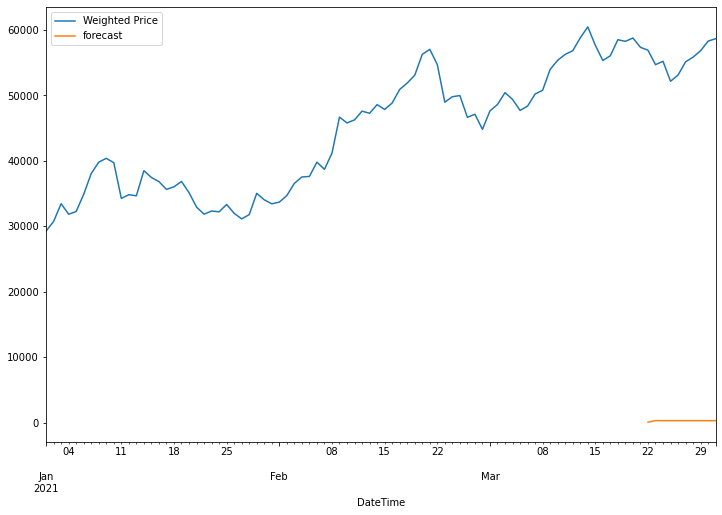

In [792]:
Bitcoin2021_df_copy['forecast']=model_fit.predict(start=80,end=90,dynamic=True)
Bitcoin2021_df_copy[['Weighted Price','forecast']].plot(figsize=(12,8))

In [793]:
model=sms.tsa.statespace.SARIMAX(Bitcoin2021_df_copy['Weighted Price'],order=(2,1,4),seasonal_order=(2,1,4,18))
results=model.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DateTime'>

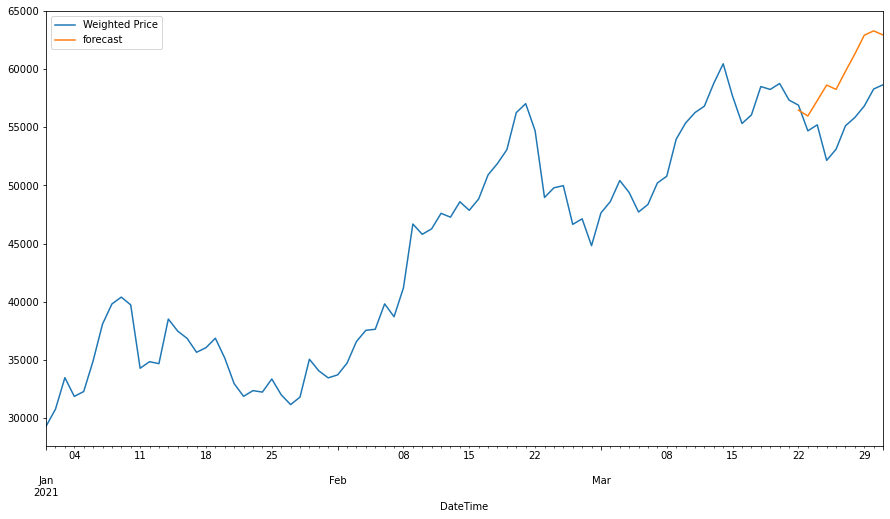

In [794]:
Bitcoin2021_df_copy['forecast']=results.predict(start=80,end=90,dynamic=True)
Bitcoin2021_df_copy[['Weighted Price','forecast']].plot(figsize=(15,8))

In [795]:
from pandas.tseries.offsets import DateOffset
future_dates=[Bitcoin2021_df_copy.index[-1]+ DateOffset(days=x)for x in range(0,15)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=Bitcoin2021_df_copy.columns)
future_datest_df.head(16)

,Weighted Price,Price First Difference,Seasonal First Difference,forecast
2021-04-01 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-02 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-03 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-04 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-05 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-06 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-07 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-08 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-09 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-04-10 00:00:00-04:00,NaN,NaN,NaN,NaN


In [796]:
future_df=pd.concat([Bitcoin2021_df_copy,future_datest_df])

<AxesSubplot:>

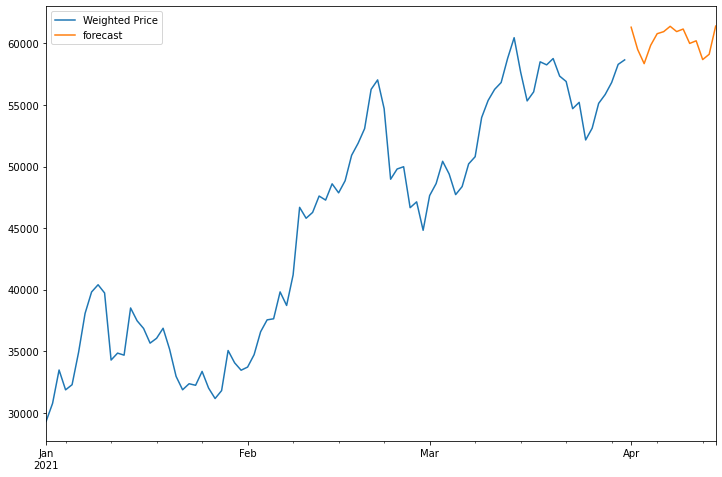

In [797]:
future_df['forecast'] = results.predict(start = 90, end = 105, dynamic= True)  
future_df[['Weighted Price', 'forecast']].plot(figsize=(12, 8)) 

In [798]:
future_df.tail(15)

,Weighted Price,Price First Difference,Seasonal First Difference,forecast
2021-03-31 00:00:00-04:00,58667.396101,366.600053,-126.302809,NaN
2021-04-01 00:00:00-04:00,NaN,NaN,NaN,61321.028613
2021-04-02 00:00:00-04:00,NaN,NaN,NaN,59510.220475
2021-04-03 00:00:00-04:00,NaN,NaN,NaN,58361.153342
2021-04-04 00:00:00-04:00,NaN,NaN,NaN,59850.272476
2021-04-05 00:00:00-04:00,NaN,NaN,NaN,60794.113851
2021-04-06 00:00:00-04:00,NaN,NaN,NaN,60960.659165
2021-04-07 00:00:00-04:00,NaN,NaN,NaN,61394.815164
2021-04-08 00:00:00-04:00,NaN,NaN,NaN,60965.480372
2021-04-09 00:00:00-04:00,NaN,NaN,NaN,61172.894268
